# Machine Learning for Predictive Analytics Mini Sprint
This notebook is documents the process of building a predictive model for the Machine Learning for Predictive Analytics Mini Sprint. We worked with a dataset from Bain & Company's HR department. The dataset contains information about employee attrition and our goal is to build a highly accurate model that can predict which employees are likely to leave the company, and to identify the key factors that influence attrition.

In [31]:
# Here we import all our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import sklearn.tree as tree
from IPython.display import Image
from pandas.api import types 
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier, plot_tree

# Set the path to the data and unzip it
data_path = '../data/predictive-analytics-sprint/'

In [ ]:
zip_file = 'data.zip'
!unzip -o {data_path + zip_file} -d {data_path}

## Cleaning and Preprocessing Data

In [3]:
# Load the data
general_data = pd.read_csv(data_path + 'general_data.csv')
# We swap the columns 'EmployeeID' and 'Age' to make the data more readable
cols = list(general_data.columns)
a, b = cols.index('EmployeeID'), cols.index('Age')
cols[b], cols[a] = cols[a], cols[b]
general_data = general_data[cols]

employee_survey_data = pd.read_csv(data_path + 'employee_survey_data.csv')
manager_survey_data = pd.read_csv(data_path + 'manager_survey_data.csv')

display(general_data.head() , employee_survey_data.head() , manager_survey_data.head())

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,No,Travel_Rarely,Sales,6,2,Life Sciences,1,51,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,31,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,No,Travel_Frequently,Research & Development,17,4,Other,1,32,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,No,Non-Travel,Research & Development,2,5,Life Sciences,1,38,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,No,Travel_Rarely,Research & Development,10,1,Medical,1,32,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [4]:
# Here we merge all three data frames into oneon the employee column
data = pd.merge(general_data, employee_survey_data, on='EmployeeID')
data = pd.merge(data, manager_survey_data, on='EmployeeID')
data.isnull().sum()

EmployeeID                  0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Age                         0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [5]:
# Drop rows with missing values
data.dropna(inplace=True)
data.isnull().sum()

EmployeeID                 0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Age                        0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [6]:
analysis_data = data.copy()
trainin_data = data.copy()

## Data Analysis 

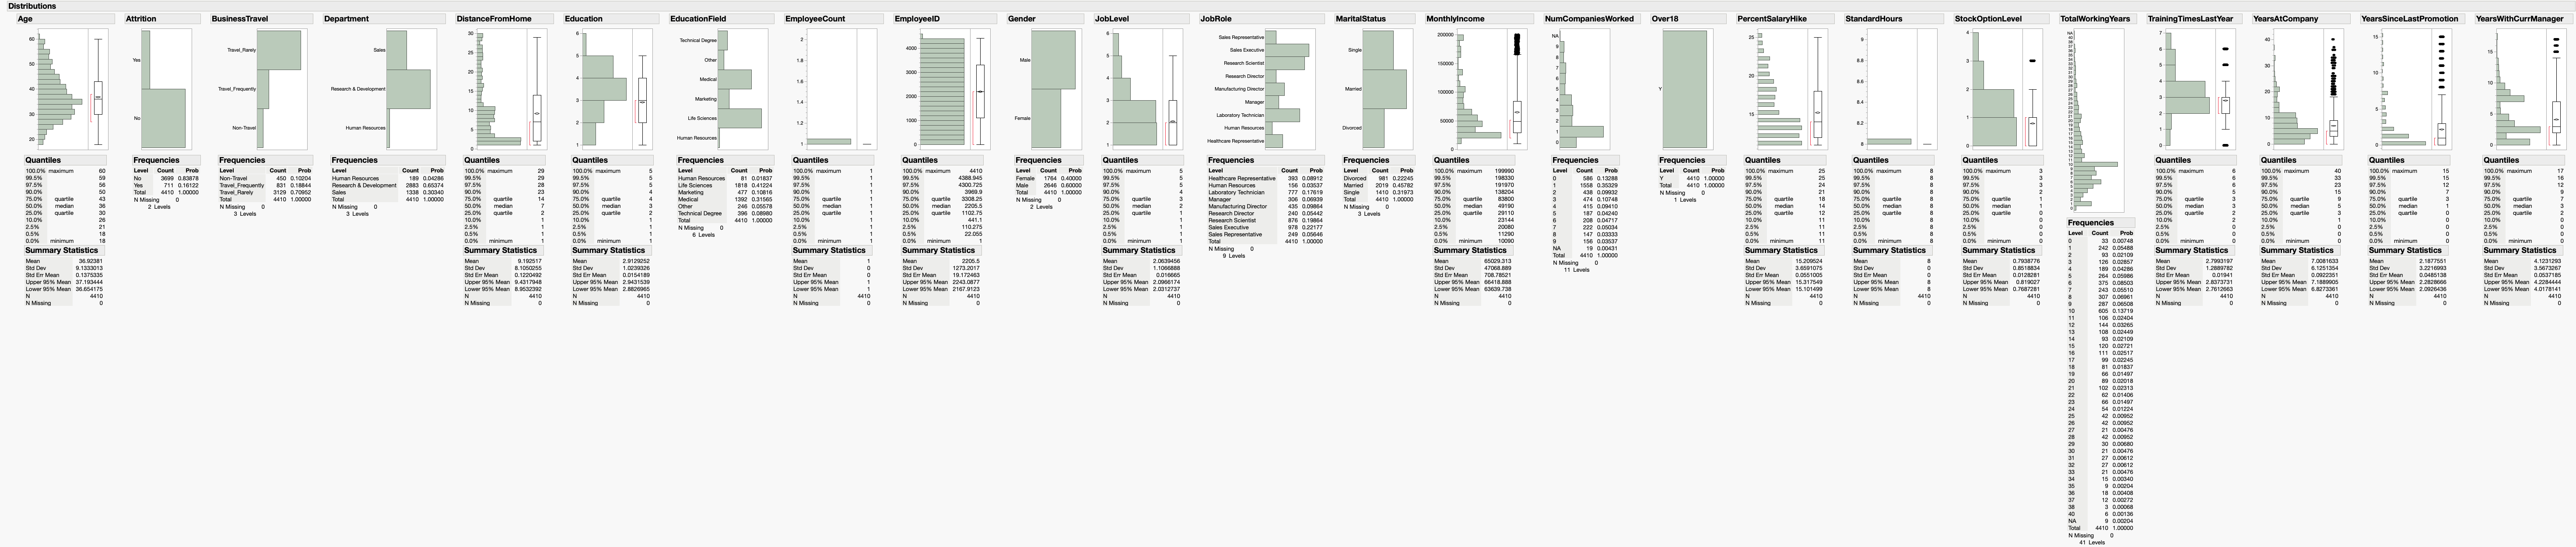

,EmployeeID,DistanceFromHome,Education,EmployeeCount,Age,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,9.197907,2.913256,1.0,36.926977,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,1272.117692,8.097059,1.024774,0.0,9.146517,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,1.000000,1.000000,1.000000,1.0,18.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1110.750000,2.000000,2.000000,1.0,30.000000,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2215.500000,7.000000,3.000000,1.0,36.000000,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3314.250000,14.000000,4.000000,1.0,43.000000,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4409.000000,29.000000,5.000000,1.0,60.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [7]:
data_description = 'data_description.png'
display(Image(data_path + data_description), analysis_data.describe())

In [8]:
# Loop through the columns and convert the non-numeric columns to numeric
for column in analysis_data.columns:
  # Check if the data type is not an integer or a float
  if not types.is_numeric_dtype(analysis_data[column]):
    # One hot encode the column with numerical categories
    analysis_data[column] = pd.Categorical(analysis_data[column])
    analysis_data[column] = analysis_data[column].cat.codes
analysis_data.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,0,2,2,6,2,1,1,51,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,1,1,1,10,1,1,1,31,0,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,0,1,1,17,4,4,1,32,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,0,0,1,2,5,1,1,38,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,0,2,1,10,1,3,1,32,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [9]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Select the columns to normalize (excluding 'Attrition')
columns_to_normalize = analysis_data.columns[analysis_data.columns != 'Attrition']
# Normalize the selected columns
analysis_data[columns_to_normalize] = scaler.fit_transform(analysis_data[columns_to_normalize])
analysis_data.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.000000,0,1.0,1.0,0.178571,0.25,0.2,0.0,0.785714,0.0,...,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0
1,0.000227,1,0.5,0.5,0.321429,0.00,0.2,0.0,0.309524,0.0,...,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0
2,0.000454,0,0.5,0.5,0.571429,0.75,0.8,0.0,0.333333,1.0,...,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0
3,0.000681,0,0.0,0.5,0.035714,1.00,0.2,0.0,0.476190,1.0,...,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0
4,0.000907,0,1.0,0.5,0.321429,0.00,0.6,0.0,0.333333,1.0,...,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0


/home/rdugue/miniconda3/envs/machine-learning/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


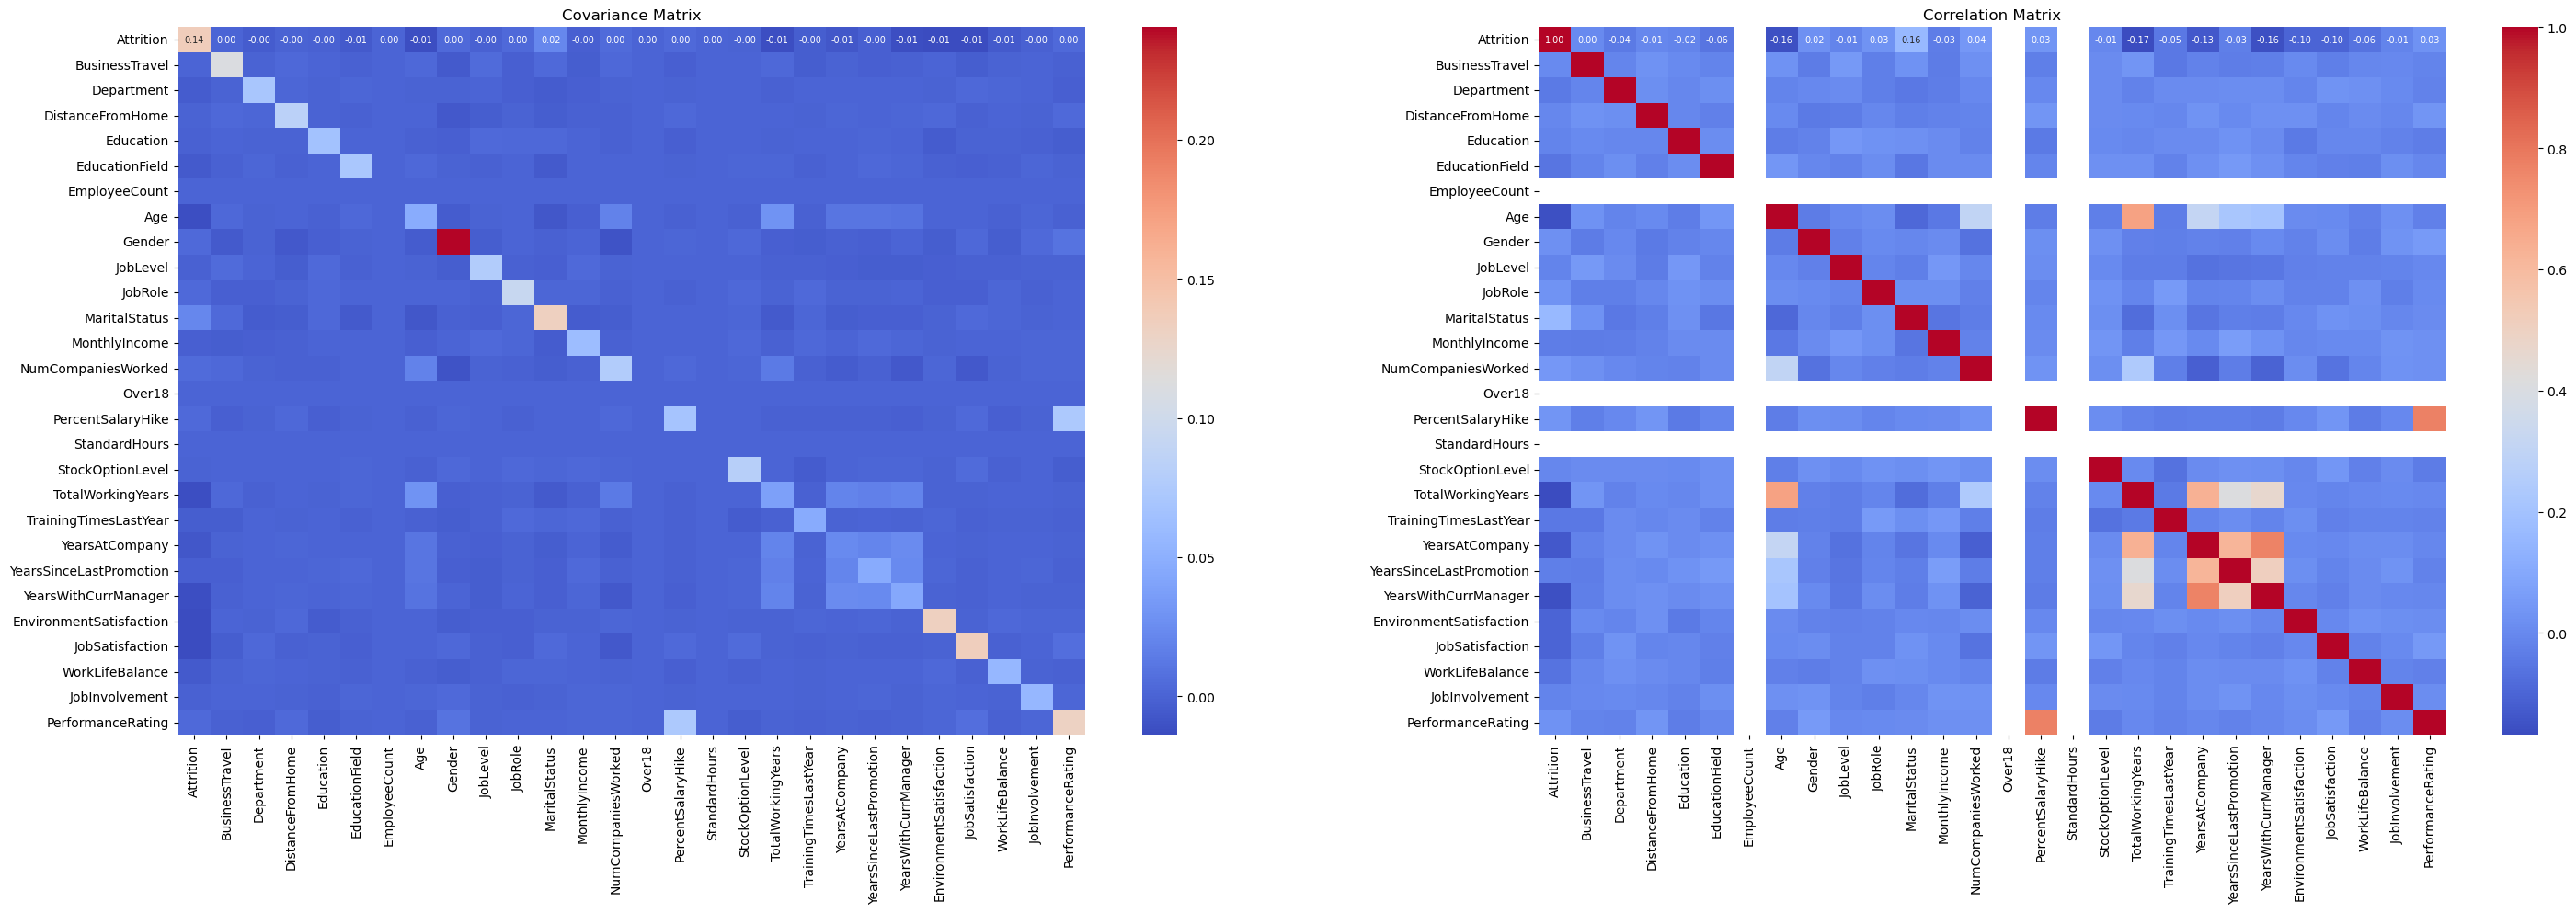

In [10]:
cov_matrix = analysis_data.drop(columns=['EmployeeID']).cov()
corr_matrix = analysis_data.drop(columns=['EmployeeID']).corr()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 10)) 

# Plot covariance matrix
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', ax=ax1, fmt='.2f', annot_kws={'size': 7})
ax1.set_title('Covariance Matrix')

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax2, fmt='.2f', annot_kws={'size': 7})
ax2.set_title('Correlation Matrix')

plt.show()

## Feature Selection and Engineering
Based on the covariance corrrlation matrix, we can see that the following features have no correlation with the target variable Attrition and can be dropped from the training dataset:
- EmployeeCount
- Over18
- StandardHours

We will also drop EmloyeeID as it is not relevant to the analysis. Finally, we will also drop the features Age, MaritalStatus, and Gender as we want to avoid any potential discriminatory biases in the model:

In [11]:
drop_columns = ['EmployeeID', 'EmployeeCount', 'StandardHours', 'MaritalStatus', 'Age', 'Over18', 'Gender']
trainin_data = trainin_data.drop(columns=drop_columns)

Here we will also encode the categorical variables using one-hot encoding or label encoding. We will experiment with both methods to see which one works best for our dataset.

In [12]:
# Identify categorical features (modify as needed)
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole']
# One-hot encode the specified features
trainin_data = pd.get_dummies(trainin_data, columns=categorical_features)
trainin_data['Attrition'] = trainin_data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Loop through the columns and convert the non-numeric columns to numeric
for column in trainin_data.columns:
  # Check if the data type is not an integer or a float
  if not types.is_numeric_dtype(trainin_data[column]):
    # One hot encode the column with numerical categories
    trainin_data[column] = pd.Categorical(trainin_data[column])
    trainin_data[column] = trainin_data[column].cat.codes

In [13]:
# Split the data into training,testing and validation sets
x_data = trainin_data.drop('Attrition', axis=1)
y_data = trainin_data['Attrition']
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
# Display shapes of the data
display(trainin_data.head(), train_x.shape, test_x.shape, train_y.shape, test_y.shape)

,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,6,2,1,131160,1.0,11,0,1.0,6,...,False,True,False,False,False,False,False,False,False,False
1,1,10,1,1,41890,0.0,23,1,6.0,3,...,False,False,False,False,False,False,False,True,False,False
2,0,17,4,4,193280,1.0,15,3,5.0,2,...,False,False,False,False,False,False,False,False,True,False
3,0,2,5,3,83210,3.0,11,3,13.0,5,...,False,False,True,False,False,False,False,False,False,False
4,0,10,1,1,23420,4.0,12,2,9.0,2,...,False,False,False,False,False,False,False,False,True,False


(3440, 38)

(860, 38)

(3440,)

(860,)

## Model Setup
### Decision Tree Models vs. Logistic Regression
Based on our analysis, we will set up a model to predict employee attrition. We needed to decide between a logistic regression model or decision trees. After doing some research, we decided to use decision trees because they are more interpretable and can help us identify the key factors that influence attrition. We decided to build two models: One being a decision tree and the other being a gradient boosted forest. The reasoning for this is we believe while the gradient boosted forest will be more accurate, the decision tree will be more interpretable and will help us identify the key factors that influence attrition. This will benefit us in terms of explainability When presenting our findings to the HR lead, Kim.

### Understanding Model Execution
We will train the models on the training data and evaluate their performance on the test data. We will use the following metrics to evaluate the models: 
- **Accuracy**: The proportion of correctly classified instances. 
- **Precision**: The proportion of true positive instances among the instances that are predicted as positive.
- **Recall**: The proportion of true positive instances that are correctly predicted as positive.
- **F1 score**: The harmonic mean of precision and recall. 

We need to consider the following parameters For decision trees:
- **max_depth**: The maximum depth of the tree. Increasing the maximum depth of the tree will increase the complexity of the model and may lead to overfitting. 
- **learning_rate**: The learning rate of the gradient boosted forest. A lower learning rate will similarly make the model more susceptible to overfitting and will require more trees, but can Potentially achieve higher levels of accuracy. 
- **n_estimators**: The number of trees in the gradient boosted forest. Increasing the number of trees seems to have the most effect on training time, but overall the training still finishes in a matter of seconds with even 500 estimators.

With all three of these parameters we will be sure to cross validate With our test set to ensure we are not overfitting and that we are getting the best possible model. 

In [14]:
# Create a DecisionTreeClassifier object
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'ccp_alpha': [0, 0.01, 0.02]
}
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=kfold, scoring='accuracy') 
grid_search.fit(train_x, train_y)

decision_tree_params = grid_search.best_params_
print(f'Best parameters: {decision_tree_params}')
print(f'Best score: {grid_search.best_score_}')
decision_tree = DecisionTreeClassifier(**decision_tree_params)

Best parameters: {'ccp_alpha': 0, 'max_depth': 7, 'min_samples_split': 5}
Best score: 0.8700581395348838


In [15]:
best_params = {
    'colsample_bytree': 1.0, 
    'eta': 0.1, 
    'gamma': 0.2, 
    'learning_rate': 0.5, 
    'max_depth': 3, 
    'min_child_weight': 3, 
    'n_estimators': 500, 
    'objective': 
    'binary:logistic', 
    'reg_alpha': 0, 
    'reg_lambda': 0.2, 
    'subsample': 0.8
}
xgb_model = XGBClassifier(**best_params)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = cross_val_score(xgb_model, train_x, train_y, cv=kfold)

print(results)
print(f'Cross Validation Accuracy: {results.mean()*100:.2f}% ({results.std()*100:.2f}%)')

[0.99418605 0.99127907 1.         0.99709302 0.98546512 0.98837209
 0.98837209 0.96511628 0.98255814 0.99709302]
Cross Validation Accuracy: 98.90% (0.95%)


In [ ]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.3, 0.5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
    'eta': [0.1, 0.2, 0.3],
    'objective': ['binary:logistic']
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_search.fit(train_x, train_y)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_}')
best_params = grid_search.best_params_

In [16]:
best_xgb_model = XGBClassifier(**best_params)

## Model Training and Evaluation

In [17]:
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0, max_depth=7, min_samples_split=5)

In [18]:
best_xgb_model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0.2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [19]:
decision_tree_accuracy = decision_tree.score(test_x, test_y)
decision_tree_precision = precision_score(test_y, decision_tree.predict(test_x))
decision_tree_recall = recall_score(test_y, decision_tree.predict(test_x))
decision_tree_f1 = f1_score(test_y, decision_tree.predict(test_x))

xgb_accuracy = best_xgb_model.score(test_x, test_y)
xgb_precision = precision_score(test_y, best_xgb_model.predict(test_x))
xgb_recall = recall_score(test_y, best_xgb_model.predict(test_x))
xgb_f1 = f1_score(test_y, best_xgb_model.predict(test_x))

print(f'Decision Tree Classifier Accuracy: {decision_tree_accuracy}')
print(f'Decision Tree Classifier Precision: {decision_tree_precision}')
print(f'Decision Tree Classifier Recall: {decision_tree_recall}')
print(f'Decision Tree Classifier F1 Score: {decision_tree_f1}')

print(f'XGBoost Classifier Accuracy: {xgb_accuracy}')
print(f'XGBoost Classifier Precision: {xgb_precision}')
print(f'XGBoost Classifier Recall: {xgb_recall}')
print(f'XGBoost Classifier F1 Score: {xgb_f1}')

Decision Tree Classifier Accuracy: 0.8709302325581395
Decision Tree Classifier Precision: 0.8333333333333334
Decision Tree Classifier Recall: 0.27972027972027974
Decision Tree Classifier F1 Score: 0.41884816753926707
XGBoost Classifier Accuracy: 0.9930232558139535
XGBoost Classifier Precision: 0.9790209790209791
XGBoost Classifier Recall: 0.9790209790209791
XGBoost Classifier F1 Score: 0.9790209790209791


Based on our evaluation results we can conclude the following:
- **Accuracy**: The gradient boosted forest model has a higher accuracy than the decision tree model.
- **Precision**: The gradient boosted forest model has a higher precision than the decision tree model.
- **Recall**: The gradient boosted forest model has a higher recall than the decision tree model.
- **F1 Score**: The gradient boosted forest model has a higher F1 score than the decision tree model.


## Visualizations and Insights

[[0.9958159  0.0041841 ]
 [0.02097902 0.97902098]]
[[0.9888424  0.0111576 ]
 [0.72027972 0.27972028]]


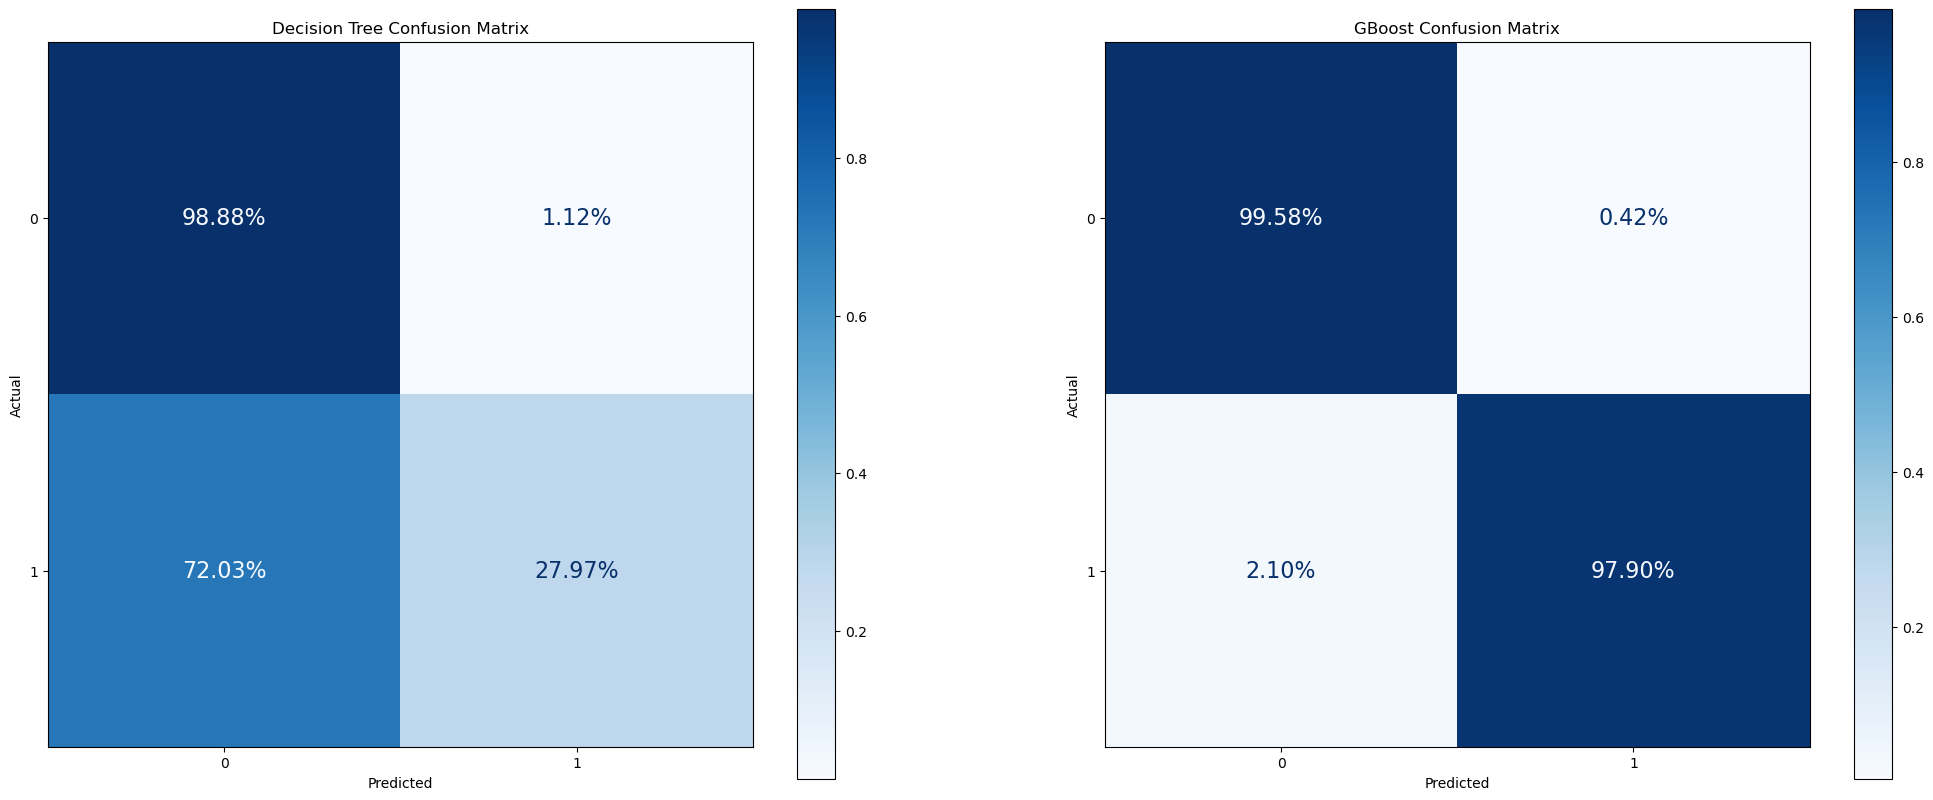

In [34]:
# Make predictions using the decision tree model
decision_tree_predictions = decision_tree.predict(test_x)
decision_tree_cm = confusion_matrix(test_y, decision_tree_predictions)
decision_tree_cm = normalize(decision_tree_cm, axis=1, norm='l1')

# Make predictions using the XGBoost model
gboost_predictions = best_xgb_model.predict(test_x)
gboost_cm = confusion_matrix(test_y, gboost_predictions)
gboost_cm = normalize(gboost_cm, axis=1, norm='l1')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# Confusion matrix for Decision Tree
ConfusionMatrixDisplay(confusion_matrix=decision_tree_cm).plot(cmap='Blues', ax=ax1, values_format='.2%', text_kw={'size': 16})
ax1.set_title('Decision Tree Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Confusion matrix for Gradient Boosting
ConfusionMatrixDisplay(confusion_matrix=gboost_cm).plot(cmap='Blues', ax=ax2, values_format='.2%', text_kw={'size': 16})
ax2.set_title('GBoost Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

print(gboost_cm)
print(decision_tree_cm)


[Text(0.4143880208333333, 0.9375, 'TotalWorkingYears <= 1.5\ngini = 0.269\nsamples = 3440\nvalue = [2888, 552]\nclass = No'),
 Text(0.17252604166666666, 0.8125, 'BusinessTravel_Travel_Frequently <= 0.5\ngini = 0.499\nsamples = 221\nvalue = [114, 107]\nclass = No'),
 Text(0.12630208333333334, 0.6875, 'MonthlyIncome <= 106615.0\ngini = 0.48\nsamples = 182\nvalue = [109, 73]\nclass = No'),
 Text(0.0859375, 0.5625, 'BusinessTravel_Non-Travel <= 0.5\ngini = 0.499\nsamples = 141\nvalue = [74, 67]\nclass = No'),
 Text(0.057291666666666664, 0.4375, 'WorkLifeBalance <= 2.5\ngini = 0.498\nsamples = 122\nvalue = [57, 65]\nclass = Yes'),
 Text(0.03125, 0.3125, 'JobRole_Human Resources <= 0.5\ngini = 0.26\nsamples = 26\nvalue = [4, 22]\nclass = Yes'),
 Text(0.020833333333333332, 0.1875, 'PercentSalaryHike <= 11.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]\nclass = Yes'),
 Text(0.010416666666666666, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.03125, 0.0625, 'gini = 0.0\

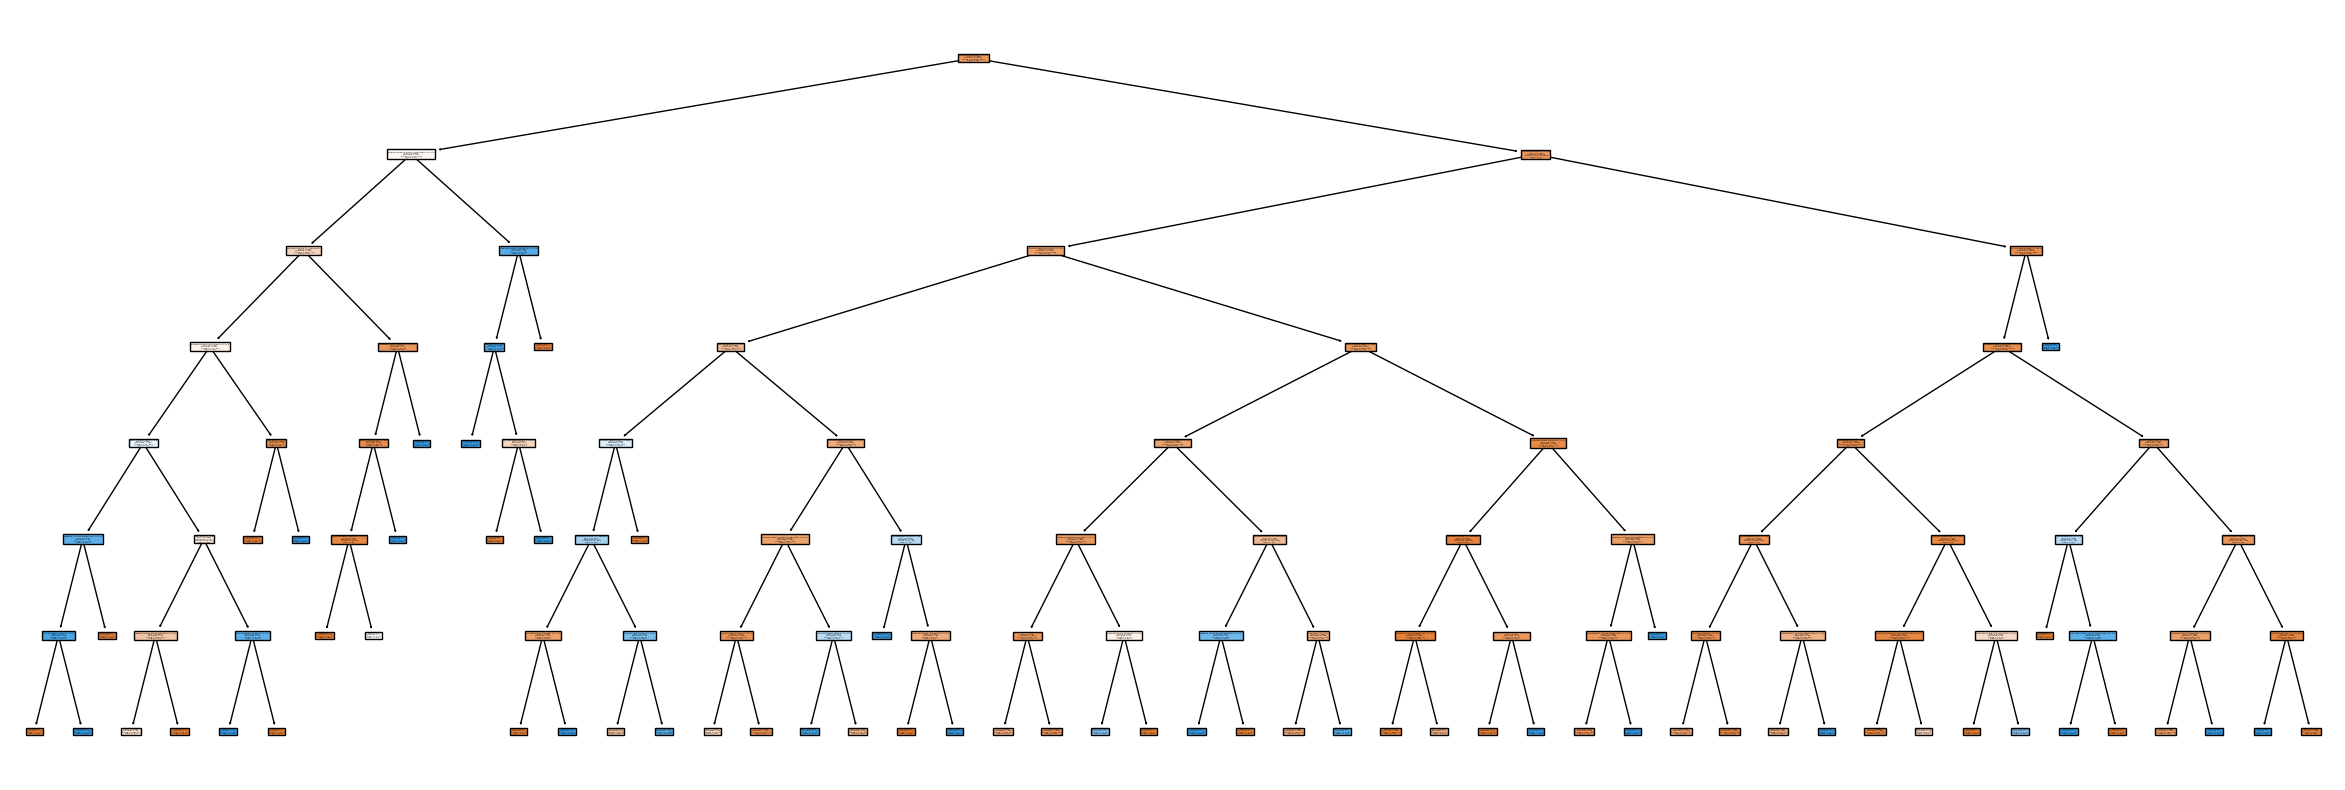

In [22]:
plt.figure(figsize=(30, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=train_x.columns.tolist(), class_names=['No', 'Yes'])

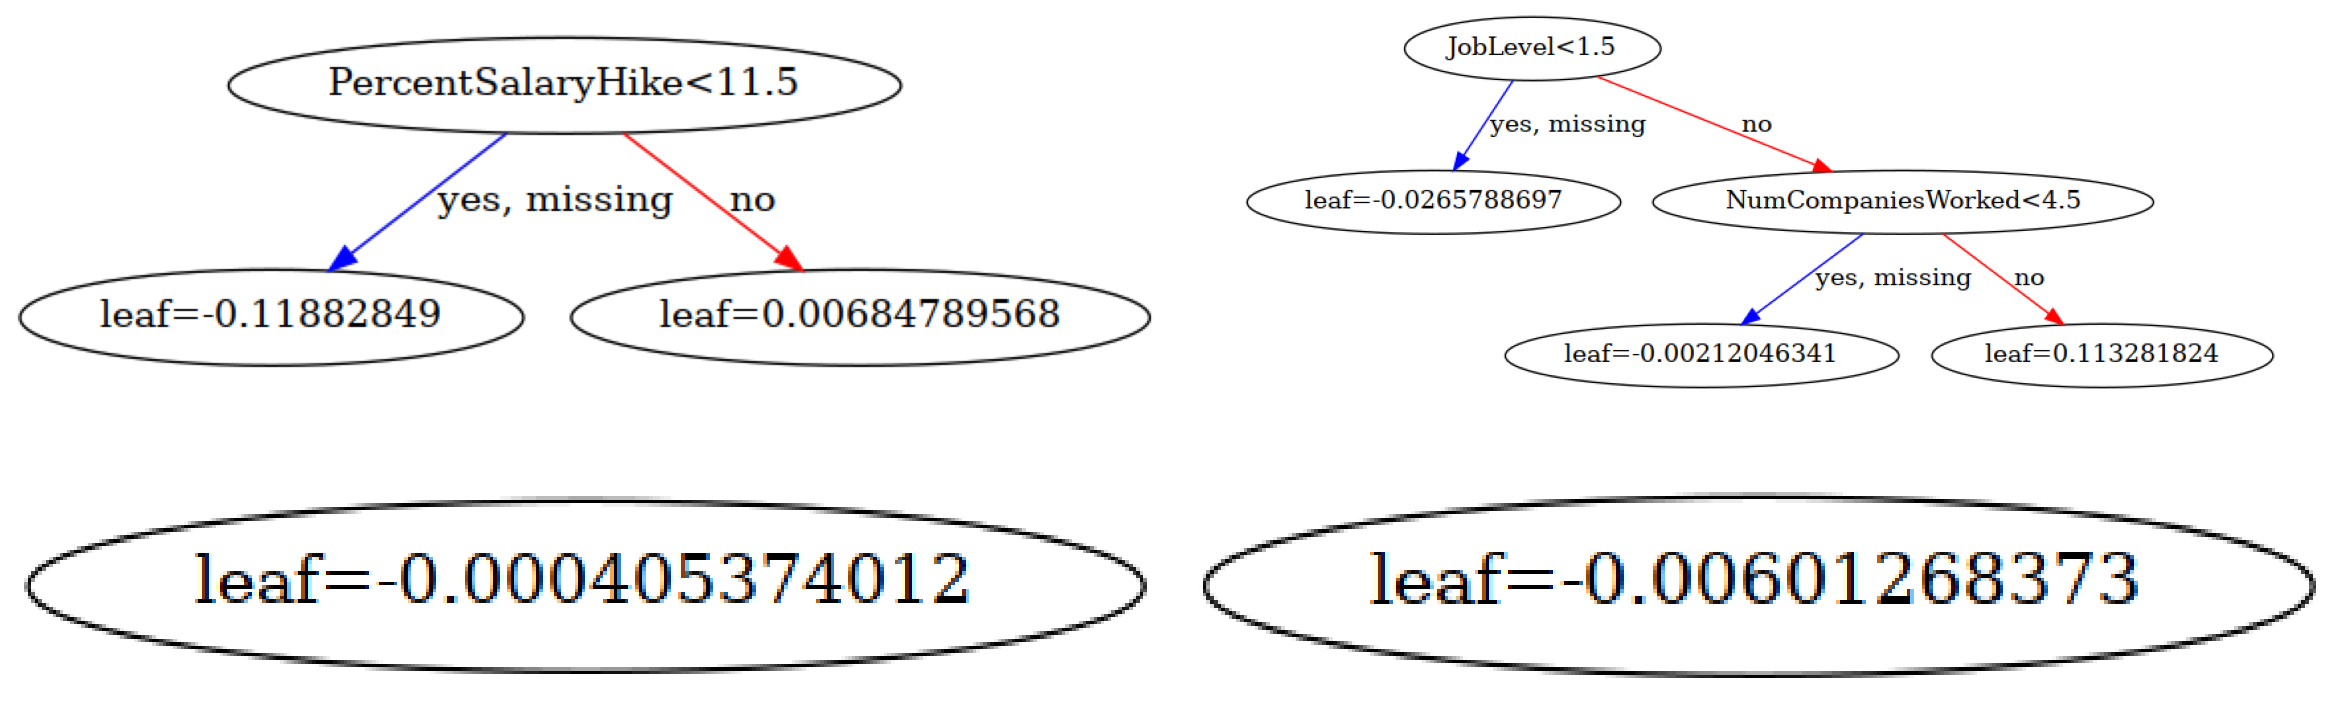

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
end = best_params['n_estimators'] - 1
for i in range(4):
    plot_tree(best_xgb_model, num_trees=end-i, ax=axes[i//2, i%2])
plt.subplots_adjust(wspace=0.02, hspace=0.0002)

In [21]:
nan_importances = []
for feature, importance in zip(train_x.columns, decision_tree.feature_importances_):
    if np.isnan(importance):
        nan_importances.append(feature)

nan_importances

[]

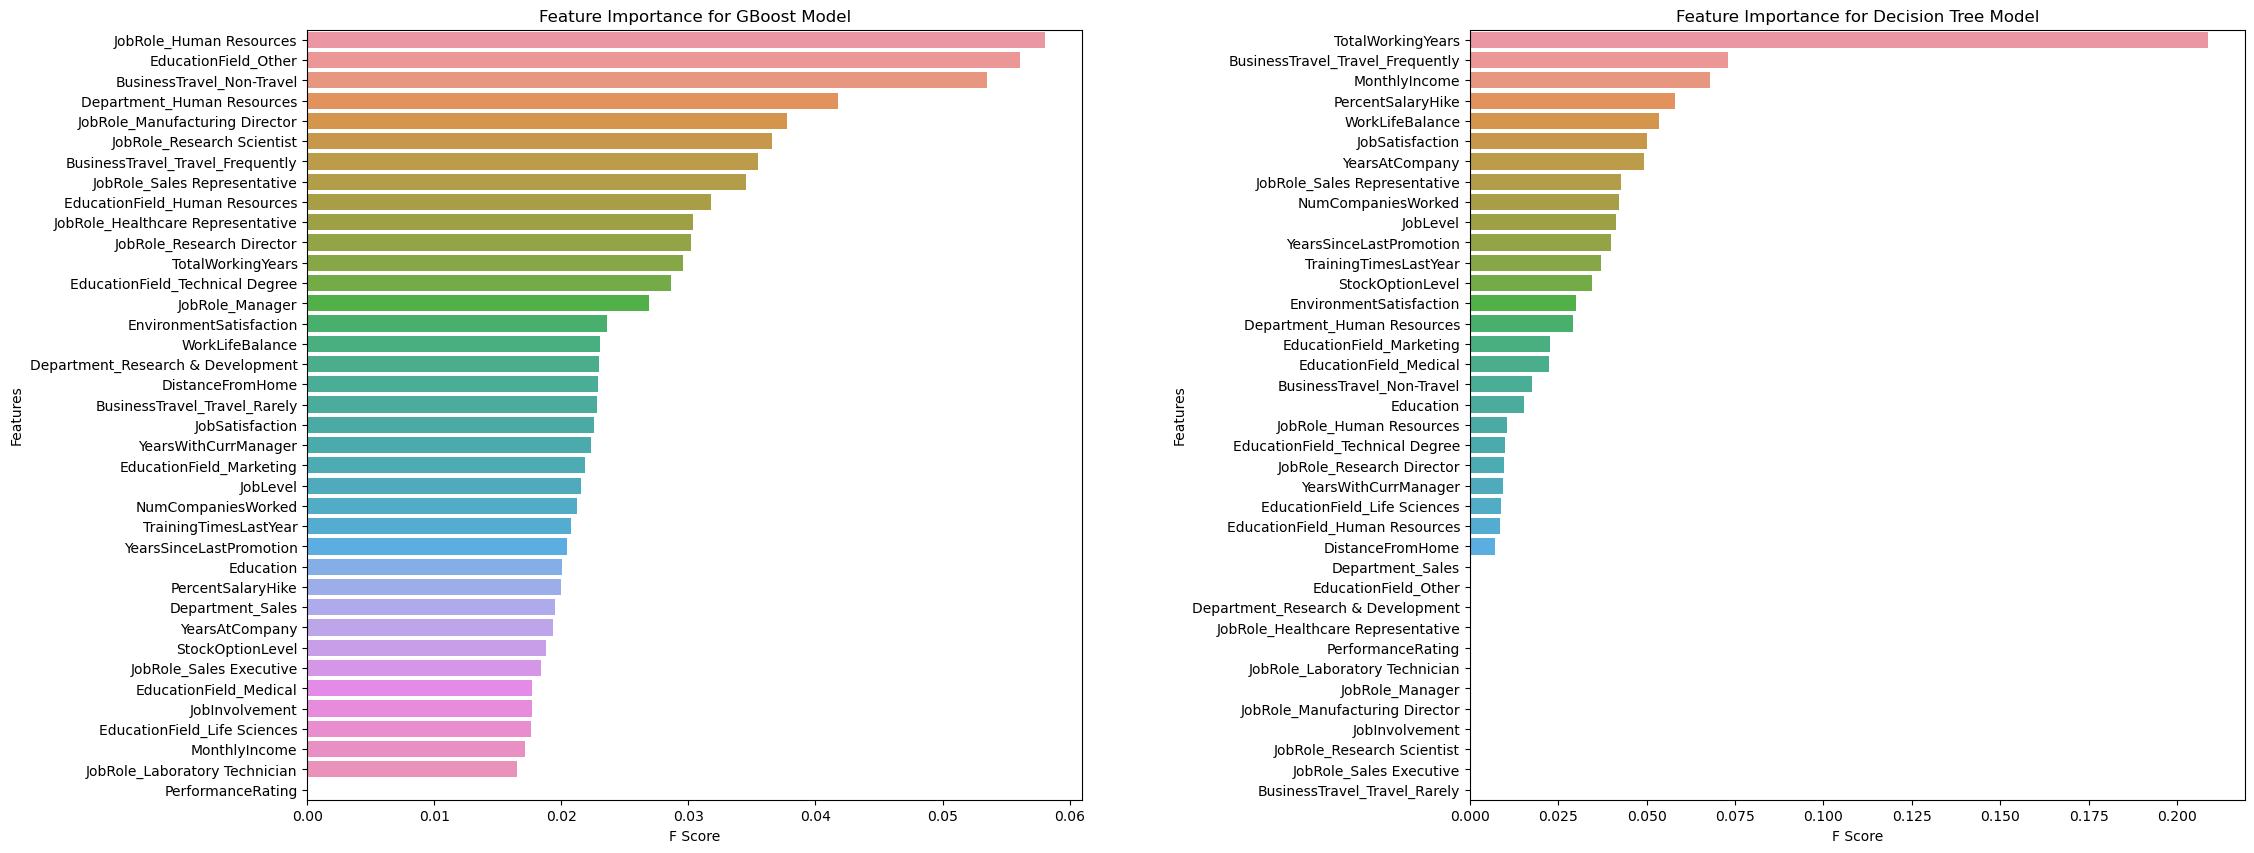

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
importance = best_xgb_model.feature_importances_
df_importance = pd.DataFrame({'Feature': train_x.columns, 'Importance': importance})
df_importance = df_importance.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_importance, ax=ax1)
ax1.set_title('Feature Importance for GBoost Model')
ax1.set_xlabel('F Score')
ax1.set_ylabel('Features')

importance = decision_tree.feature_importances_
df_importance = pd.DataFrame({'Feature': train_x.columns, 'Importance': importance})
df_importance = df_importance.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_importance, ax=ax2)
ax2.set_title('Feature Importance for Decision Tree Model')
ax2.set_xlabel('F Score')
ax2.set_ylabel('Features')

plt.subplots_adjust(wspace=0.5)